In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples=100, n_features = 3, centers=2, random_state=101)

In [3]:
type(data)

tuple

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [6]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [7]:
from mpl_toolkits.mplot3d import Axes3D

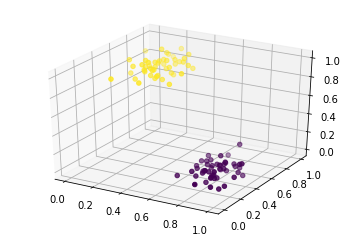

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c=data[1])

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [10]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [11]:
learning_rate = 0.01

In [12]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [13]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [14]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [16]:
init = tf.global_variables_initializer()

In [17]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data})
        

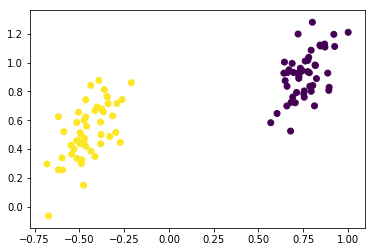

In [18]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=data[1])